In [1]:
%load_ext autoreload

%autoreload 2

# New data

- preprocess the new data
- train it on just DNN
- then on CNN
- setup tensorboard for experiment tracking

# Preprocessing

In [133]:
import sklearn
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = {}
for folder in glob.glob("../data/*"):
    f_name = folder.split("\\")[1]
    if f_name not in data:
        n_files = glob.glob(f"{folder}\*.jpg")
        data[f_name] = len(n_files)
        print(f_name, len(n_files))


+ 25112
- 33997
0 6914
1 26520
2 26141
3 10909
4 7396
5 3545
6 3118
7 2909
8 3068
9 3737
div 868
rightarrow 1703
times 3251
u 1269
v 1558
w 556
y 9340
z 5870


In [4]:
sorted(data.items(), key = lambda x:x[1], reverse=True)

[('-', 33997),
 ('1', 26520),
 ('2', 26141),
 ('+', 25112),
 ('3', 10909),
 ('y', 9340),
 ('4', 7396),
 ('0', 6914),
 ('z', 5870),
 ('9', 3737),
 ('5', 3545),
 ('times', 3251),
 ('6', 3118),
 ('8', 3068),
 ('7', 2909),
 ('rightarrow', 1703),
 ('v', 1558),
 ('u', 1269),
 ('div', 868),
 ('w', 556)]

In [5]:
df = pd.DataFrame()
df["Distribution"] = list(data.values())
df["Classes"] = list(data.keys())

In [6]:
df.head()

,Distribution,Classes
0,25112,+
1,33997,-
2,6914,0
3,26520,1
4,26141,2


In [7]:
df = df.sort_values("Distribution", ascending=False)

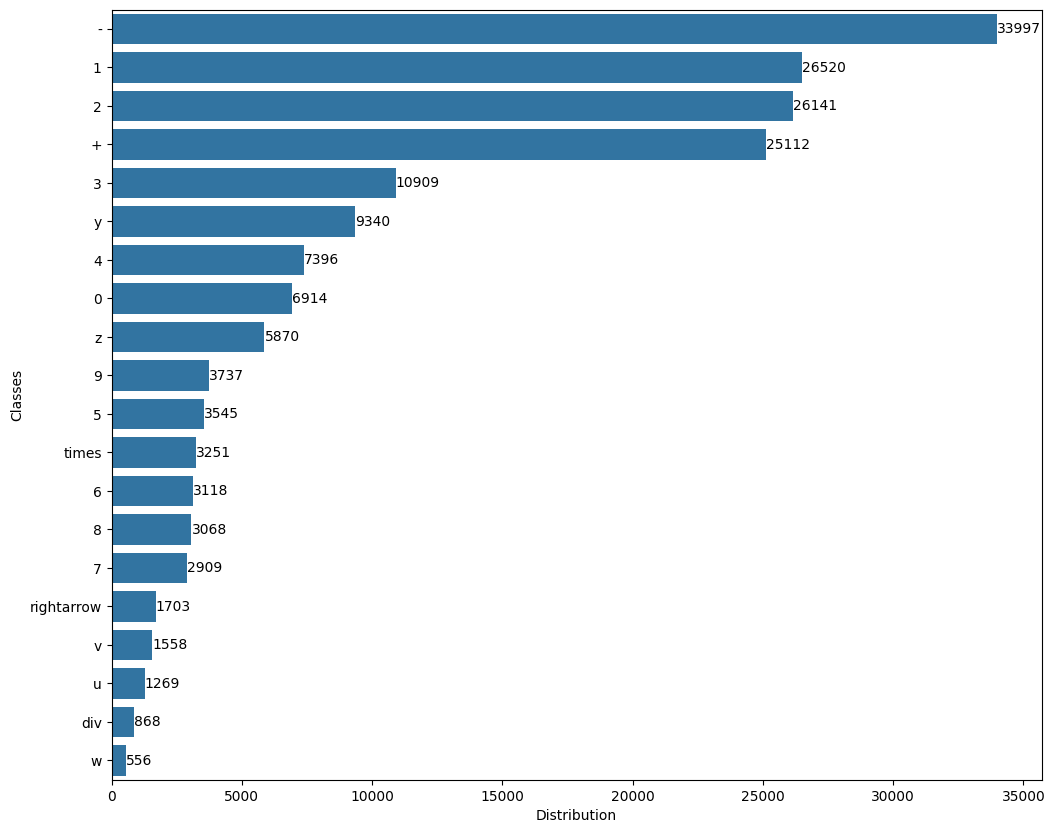

In [8]:
plt.figure(figsize=(12,10))
ax = sns.barplot(y="Classes", x="Distribution", data=df)
ax.bar_label(ax.containers[0])
plt.show()

In [9]:
sorted_labels = sorted(list(df["Classes"]))
#moving + and - to the end of the list
first_two = sorted_labels[:2]
sorted_labels = sorted_labels[2:] + first_two
print(sorted_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'div', 'rightarrow', 'times', 'u', 'v', 'w', 'y', 'z', '+', '-']


In [10]:
labels_map = {label:index for index, label in enumerate(sorted_labels)}

In [11]:
labels_map

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'div': 10,
 'rightarrow': 11,
 'times': 12,
 'u': 13,
 'v': 14,
 'w': 15,
 'y': 16,
 'z': 17,
 '+': 18,
 '-': 19}

In [134]:
import cv2

def preprocess(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(img, (5,5), 0)
    img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    return img

In [135]:
import glob
import os
from pathlib import Path
import glob

# Specify the path to your dataset
images = []
labels = []
goodlabels = sorted_labels
path = '../data/'

for label in os.listdir(path):
    if(label in goodlabels): 
        label_path = os.path.join(path,label)
        print(label_path)
        counter = 0
        for filename in os.listdir(label_path):
            if(counter > 7000):
                break
            counter = counter + 1
            img_path = os.path.join(label_path,filename)
            img = preprocess(img_path)
            images.append(img)
            labels.append(labels_map[label])


../data/+
../data/-
../data/0
../data/1
../data/2
../data/3
../data/4
../data/5
../data/6
../data/7
../data/8
../data/9
../data/div
../data/rightarrow
../data/times
../data/u
../data/v
../data/w
../data/y
../data/z


In [136]:
images = np.asarray(images)
labels = np.asarray(labels)
np.unique(labels, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([6914, 7001, 7001, 7001, 7001, 3545, 3118, 2909, 3068, 3737,  868,
        1703, 3251, 1269, 1558,  556, 7001, 5870, 7001, 7001], dtype=int64))

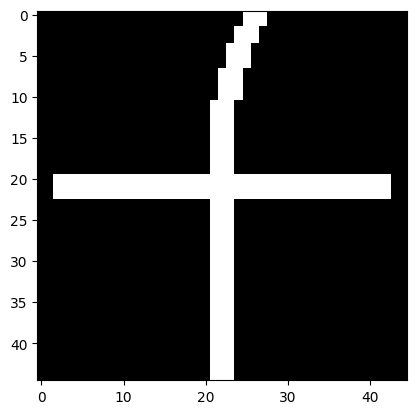

In [137]:
plt.imshow(images[1], cmap="gray")

In [138]:
from PIL import Image
from sklearn.model_selection import train_test_split
import utils

def train_test_split_data(images, labels, validation_test_size = 0.2, testset_size = 0.1, random_state = 42):
    temp_X, X_test, temp_Y, y_test = train_test_split(images, labels, test_size= validation_test_size, random_state= random_state)
    X_train, X_val, y_train, y_val = train_test_split(temp_X, temp_Y, test_size= testset_size, random_state= random_state)

    X_train, y_train = np.array(X_train), np.array(y_train)
    X_test, y_test = np.array(X_test), np.array(y_test)
    X_val, y_val = np.array(X_val), np.array(y_val)

    X_train_preprocessed = X_train
    y_train_preprocessed = y_train

    X_train_preprocessed = np.expand_dims(X_train_preprocessed, axis=1)
    X_train_preprocessed = utils.minmax_normalize(X_train_preprocessed)

    X_val_preprocessed = X_val
    y_val_preprocessed = y_val

    X_val_preprocessed = np.expand_dims(X_val_preprocessed, axis=1)
    X_val_preprocessed = utils.minmax_normalize(X_val_preprocessed)

    X_test_preprocessed = X_test
    y_test_preprocessed = y_test

    X_test_preprocessed = np.expand_dims(X_test_preprocessed, axis=1)
    X_test_preprocessed = utils.minmax_normalize(X_test_preprocessed)

    print(f"X_train shape {X_train_preprocessed.shape}")
    print(f"X_valid shape {X_val_preprocessed.shape}")
    print(f"X_test shape {X_test_preprocessed.shape}")

    return X_train_preprocessed,y_train_preprocessed,X_val_preprocessed,y_val_preprocessed,X_test_preprocessed,y_test_preprocessed


In [139]:
X_train_preprocessed,y_train_preprocessed,X_val_preprocessed,y_val_preprocessed,X_test_preprocessed,y_test_preprocessed = train_test_split_data(images, labels, random_state=42)

X_train shape (62908, 1, 45, 45)
X_valid shape (6990, 1, 45, 45)
X_test shape (17475, 1, 45, 45)


In [140]:
def idtolabel(labels_map, y):
    for key, value in labels_map.items():
        if y == value:
            return key
        
    return -1


3


Text(0.5, 0, '0')

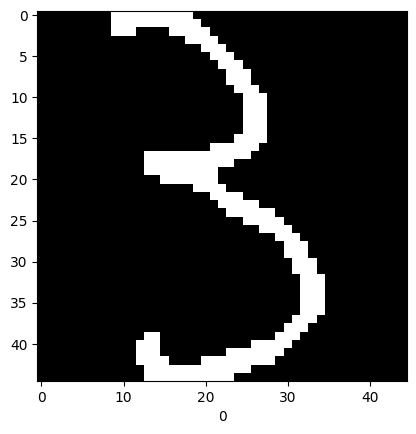

In [253]:
x_data, y_data = X_test_preprocessed, y_test_preprocessed
r = np.random.randint(0,len(x_data))
plt.imshow(x_data[0][0], cmap="gray")
print(y_data[0])
plt.xlabel(idtolabel(labels_map, y_data[r]))

0


Text(0.5, 0, 'z')

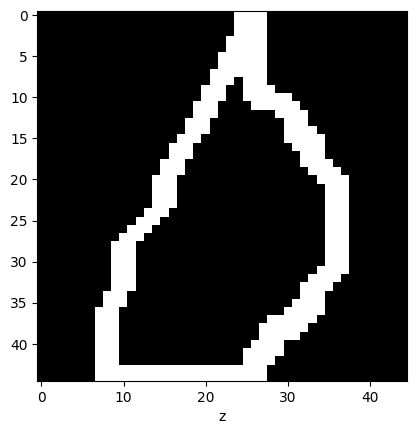

In [254]:
x_data, y_data = X_train_preprocessed, y_train_preprocessed
r = np.random.randint(0,len(x_data))
plt.imshow(x_data[0][0], cmap="gray")
print(y_data[0])
plt.xlabel(idtolabel(labels_map, y_data[r]))

# Models

#### Model 1: Flatten1, Dense1, softmax, cross entropy

#### Model 2: Dense1, relu, Dense2, softmax, cross entropy

#### Model 3: Conv1, relu, flatten1,  Dense1, softmax, cross entropy

#### Model 4: Conv2, relu1, conv1, relu2, flatten1, dense1, softmax, cross entropy

#### Model 5: Conv2, relu1, Max1, conv1, relu2, Max2, flatten1, dense1, softmax, cross entropy


#### Model 1: Dense1, softmax, cross entropy

In [186]:
from model import Sequential
from layers.dense import DenseLayer
from layers.flatten import Flatten

np.random.seed(42)

flatten_1 = Flatten("flatten_1")
dense_1 = DenseLayer("Dense_1", 2025, len(labels_map), debug=False, glorot_init=False)
layers = [flatten_1, dense_1]

deep_1 = Sequential(layers)


In [177]:
deep_1.reset_params()

In [175]:
X_train_preprocessed.shape

(62908, 1, 45, 45)

In [187]:
deep_1.train([X_train_preprocessed, y_train_preprocessed], [X_val_preprocessed, y_val_preprocessed], epochs=150, learning_rate=1e-02, debug=True, batch_size=16)

----------
Epoch 1
Init params Dense_1
Epoch Progress 99.98 %, batch 3931, batch loss 23.518409280843027, batch accuracy 8.333333333333332
Time 2.9067416191101074 seconds
Train Accuracy 8.709544096140394, Validation accuracy 10.772532188841202
Train Loss 23.67449068831956, Validation loss 21.59251947174104
----------
----------
Epoch 2
Epoch Progress 99.98 %, batch 3931, batch loss 26.43718689411087, batch accuracy 16.666666666666664
Time 3.003558397293091 seconds
Train Accuracy 13.101672283334393, Validation accuracy 16.55221745350501
Train Loss 19.88712559643075, Validation loss 18.66570594584234
----------
----------
Epoch 3
Epoch Progress 99.98 %, batch 3931, batch loss 16.384874211064233, batch accuracy 16.666666666666664
Time 2.7841827869415283 seconds
Train Accuracy 18.169390220639663, Validation accuracy 20.057224606580828
Train Loss 17.473782227453285, Validation loss 16.65620642884314
----------
----------
Epoch 4
Epoch Progress 99.98 %, batch 3931, batch loss 11.219857627853

In [188]:
print(deep_1._layers_info())

Number of Layers 2
----------
Layer 1
Layer Name -> flatten_1
----------
----------
Layer 2
Layer Name -> Dense_1
Weights shape -> (2025, 20)
----------



In [189]:
print(deep_1.train_logs())

**********
Train and Validation metrics
Epochs -> 150
Batch Size -> 16
Learning rate -> 0.01
Accuracy and Loss at the end of 151 epochs
Train Accuracy -> 76.34164176257391, Validation Accuracy -> 74.89270386266095
Train Loss -> 2.138207131440353, Validation Loss -> 2.3585958681652954
**********



In [190]:
deep_1.test([X_test_preprocessed, y_test_preprocessed])

(75.07296137339056, 2.344355587874297)

5

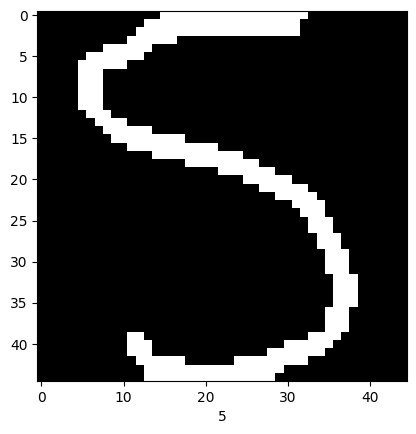

In [210]:
idx = np.random.randint(0, X_test_preprocessed.shape[0])
test_image = utils.minmax_normalize(X_test_preprocessed[idx])

plt.imshow(test_image.reshape(45, 45), cmap="gray")
plt.xlabel(y_test_preprocessed[idx])

np.argmax(deep_1._forward(np.expand_dims(test_image, 0)))

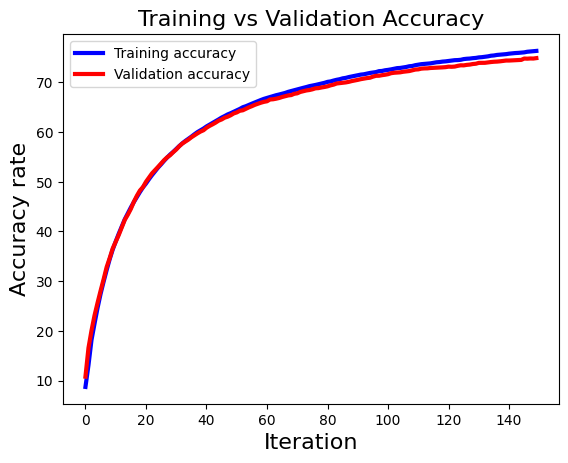

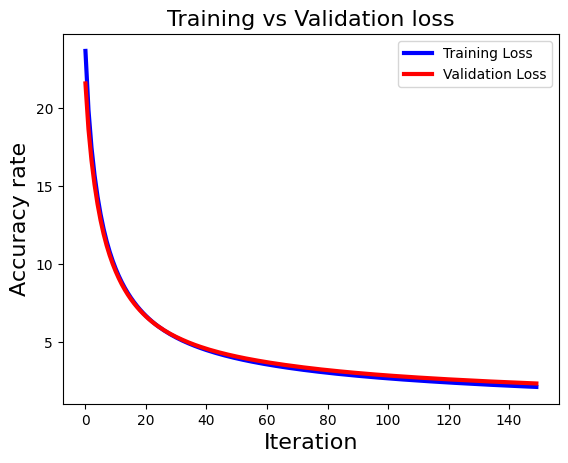

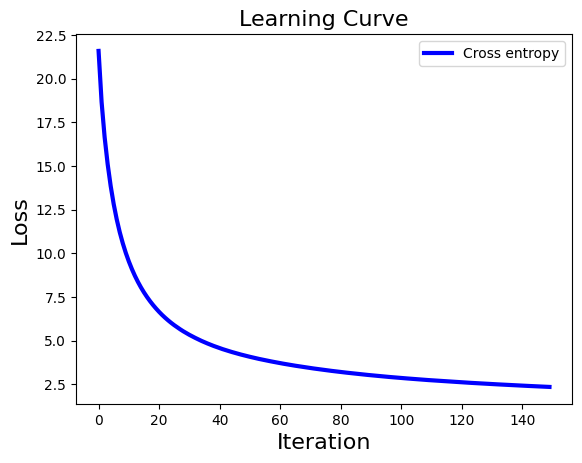

In [197]:
utils.plot_accuracy_curve(deep_1.train_accuracy, deep_1.validation_accuracy)
utils.plot_loss_curve(deep_1.train_loss, deep_1.validation_loss)
utils.plot_learning_curve(deep_1.validation_loss)


In [212]:
X_test_preprocessed.shape

(17475, 1, 45, 45)

In [223]:
y_test_probs = deep_1._forward(X_test_preprocessed)
y_test_preds = np.argmax(y_test_probs, axis=1)

Confusion Matrix:


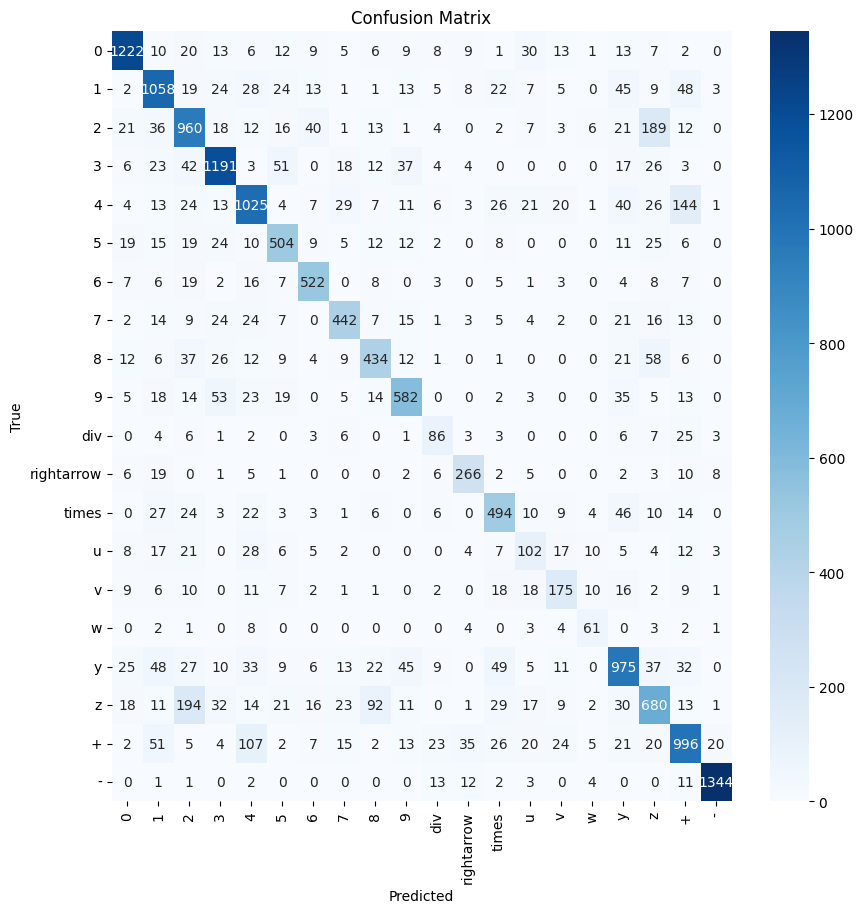

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1368
           1       0.79      0.76      0.78      1385
           2       0.70      0.66      0.68      1452
           3       0.83      0.83      0.83      1439
           4       0.72      0.74      0.73      1391
           5       0.74      0.72      0.73       702
           6       0.84      0.81      0.83       646
           7       0.73      0.77      0.75       576
           8       0.67      0.68      0.68       637
           9       0.74      0.76      0.75       764
         div       0.55      0.48      0.51       179
  rightarrow       0.79      0.76      0.77       352
       times       0.72      0.70      0.71       702
           u       0.41      0.40      0.40       256
           v       0.59      0.59      0.59       295
           w       0.69      0.59      0.63       104
           y       0.72      0.73      0.73

In [225]:
utils.plot_confusion_matrix(deep_1, goodlabels, X_test_preprocessed, y_test_preprocessed, y_test_preds)

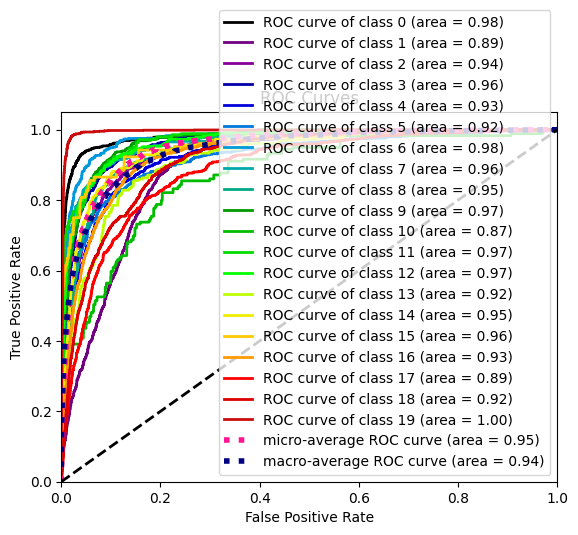

In [229]:
utils.plot_roc_curve(y_test_preprocessed, y_test_probs)

In [128]:
utils.save_model(deep_1, "deep_1")

### deep_1 model with glorot activation, and other parameters kept same

In [231]:
from model import Sequential
from layers.dense import DenseLayer
from layers.flatten import Flatten

np.random.seed(42)

flatten_1 = Flatten("flatten_1")
dense_1 = DenseLayer("Dense_1", 2025, len(labels_map), debug=False, glorot_init=True)
layers = [flatten_1, dense_1]

deep_1_glorot = Sequential(layers)


In [232]:
deep_1_glorot.reset_params()

In [233]:
deep_1_glorot.train([X_train_preprocessed, y_train_preprocessed], [X_val_preprocessed, y_val_preprocessed], epochs=20, learning_rate=1e-02, debug=True, batch_size=16)

----------
Epoch 1
Init params Dense_1
Epoch Progress 99.98 %, batch 3931, batch loss 1.608586735420029, batch accuracy 66.66666666666666
Time 4.1058669090271 seconds
Train Accuracy 44.88618299739302, Validation accuracy 59.98569384835479
Train Loss 2.0376030288234204, Validation loss 1.5555886498166593
----------
----------
Epoch 2
Epoch Progress 99.98 %, batch 3931, batch loss 1.5851661733412967, batch accuracy 66.66666666666666
Time 2.989206314086914 seconds
Train Accuracy 64.64042729064666, Validation accuracy 68.45493562231759
Train Loss 1.3710037600897056, Validation loss 1.2227740149391668
----------
----------
Epoch 3
Epoch Progress 99.98 %, batch 3931, batch loss 0.9542256301911515, batch accuracy 83.33333333333334
Time 2.993112564086914 seconds
Train Accuracy 71.07204171170598, Validation accuracy 72.96137339055794
Train Loss 1.1369563879647602, Validation loss 1.0599296194252896
----------
----------
Epoch 4
Epoch Progress 99.98 %, batch 3931, batch loss 0.7666373607846255, 

In [236]:
print(deep_1_glorot.train_logs())

**********
Train and Validation metrics
Epochs -> 20
Batch Size -> 16
Learning rate -> 0.01
Accuracy and Loss at the end of 21 epochs
Train Accuracy -> 84.8763273351561, Validation Accuracy -> 85.0071530758226
Train Loss -> 0.6012689837833791, Validation Loss -> 0.6103554523528566
**********



In [237]:
deep_1_glorot.test([X_test_preprocessed, y_test_preprocessed])

(84.01716738197425, 0.6172994110007722)

In [238]:
print(dense_1.layer_info())

Layer Name -> Dense_1
Weights shape -> (2025, 20)



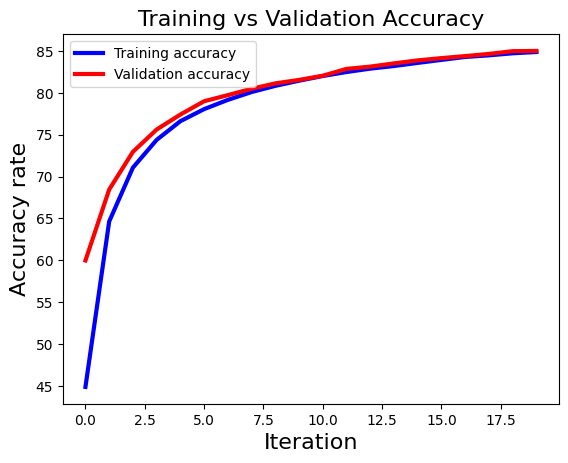

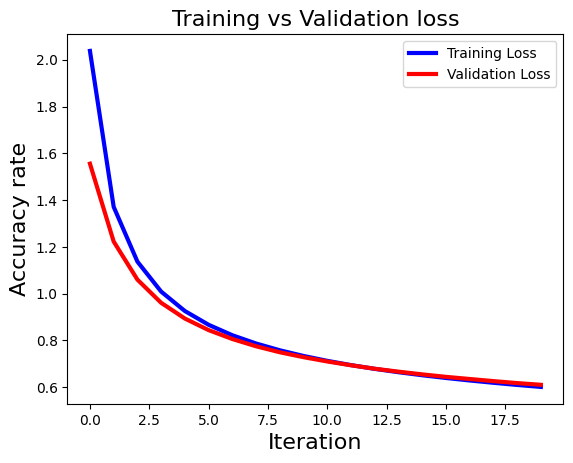

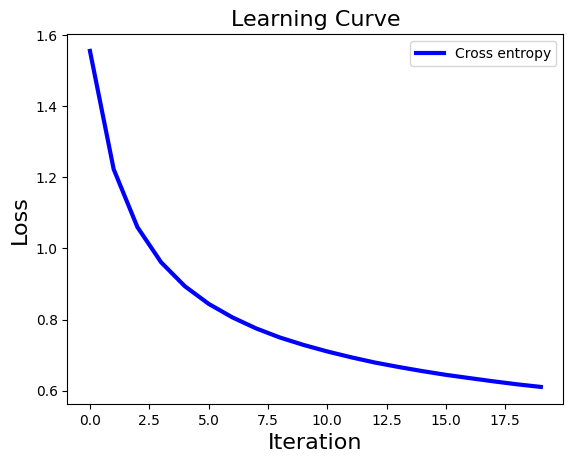

Confusion Matrix:


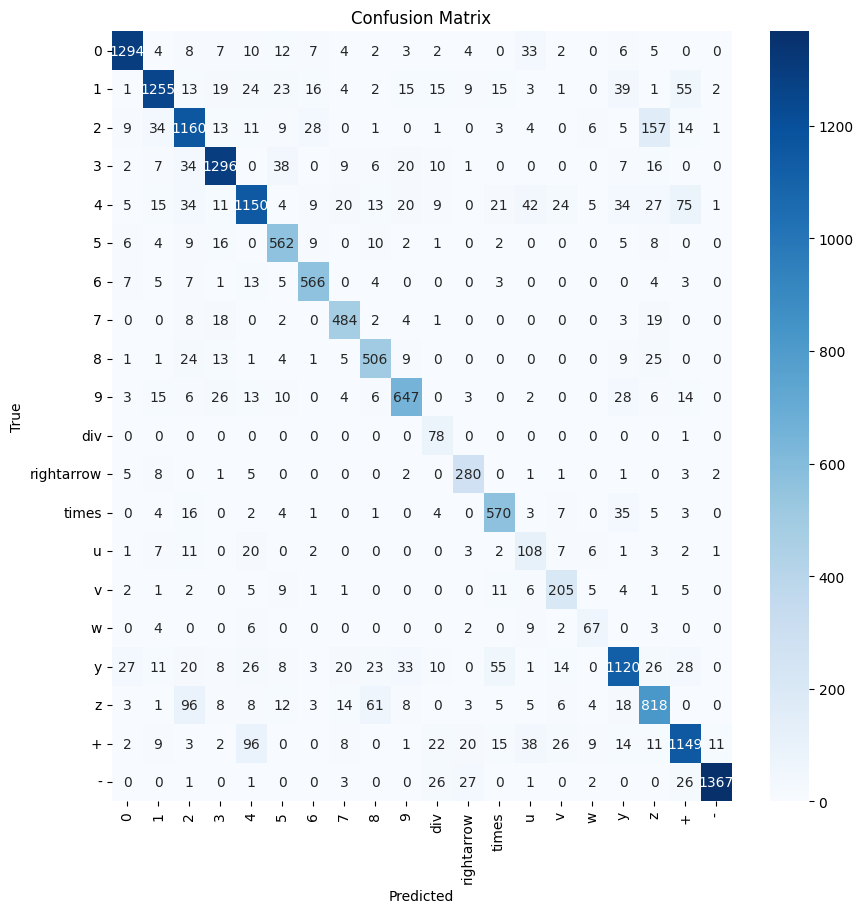

Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1368
           1       0.83      0.91      0.87      1385
           2       0.80      0.80      0.80      1452
           3       0.90      0.90      0.90      1439
           4       0.76      0.83      0.79      1391
           5       0.89      0.80      0.84       702
           6       0.92      0.88      0.90       646
           7       0.89      0.84      0.87       576
           8       0.84      0.79      0.82       637
           9       0.83      0.85      0.84       764
         div       0.99      0.44      0.60       179
  rightarrow       0.91      0.80      0.85       352
       times       0.87      0.81      0.84       702
           u       0.62      0.42      0.50       256
           v       0.79      0.69      0.74       295
           w       0.72      0.64      0.68       104
           y       0.78      0.84      0.81

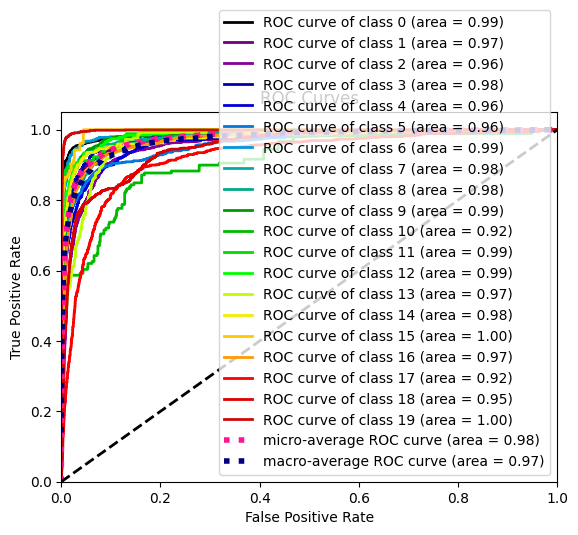

In [290]:
utils.plot_accuracy_curve(deep_1_glorot.train_accuracy, deep_1_glorot.validation_accuracy)
utils.plot_loss_curve(deep_1_glorot.train_loss, deep_1_glorot.validation_loss)
utils.plot_learning_curve(deep_1_glorot.validation_loss)
y_test_probs = deep_1_glorot._forward(X_test_preprocessed)
y_test_preds = np.argmax(y_test_probs, axis=1)
utils.plot_confusion_matrix(deep_1_glorot, goodlabels, X_test_preprocessed, y_test_preprocessed, y_test_preds)
utils.plot_roc_curve(y_test_preprocessed, y_test_probs)

#### Model 2: Dense1, relu, Dense2, softmax, cross entropy

In [248]:
from model import Sequential
from layers.dense import DenseLayer
from layers.flatten import Flatten
from layers.relu import ReluLayer

np.random.seed(42)

flatten_1 = Flatten("flatten_1")
dense_1 = DenseLayer("Dense_1", 2025, 50, debug=False, glorot_init=True)
relu_1 = ReluLayer("relu_1")
dense_2 = DenseLayer("Dense_2", 50, len(labels_map), debug=False, glorot_init=True)
layers = [flatten_1, dense_1, relu_1, dense_2]

deep_2 = Sequential(layers)


In [249]:
deep_2.reset_params()

In [250]:
deep_2.train([X_train_preprocessed, y_train_preprocessed], [X_val_preprocessed, y_val_preprocessed], epochs=20, learning_rate=1e-02, debug=True, batch_size=16)

----------
Epoch 1
Init params Dense_1
Init params Dense_2
Epoch Progress 99.98 %, batch 3931, batch loss 2.824714516211328, batch accuracy 0.0.05
Time 4.458703517913818 seconds
Train Accuracy 17.112290964583202, Validation accuracy 23.6480686695279
Train Loss 2.7956167162999055, Validation loss 2.6686335875788143
----------
----------
Epoch 2
Epoch Progress 99.98 %, batch 3931, batch loss 2.401788823608635, batch accuracy 41.66666666666667
Time 4.460157155990601 seconds
Train Accuracy 27.549755198067018, Validation accuracy 30.572246065808294
Train Loss 2.578636324635141, Validation loss 2.4889997252410065
----------
----------
Epoch 3
Epoch Progress 99.98 %, batch 3931, batch loss 2.2052349333065737, batch accuracy 41.66666666666667
Time 4.246779203414917 seconds
Train Accuracy 33.15953455840275, Validation accuracy 35.29327610872675
Train Loss 2.402266902780594, Validation loss 2.315099908942352
----------
----------
Epoch 4
Epoch Progress 99.98 %, batch 3931, batch loss 1.970888619

In [257]:
print(deep_2.train_logs())

**********
Train and Validation metrics
Epochs -> 20
Batch Size -> 16
Learning rate -> 0.01
Accuracy and Loss at the end of 21 epochs
Train Accuracy -> 73.22916004323774, Validation Accuracy -> 73.80543633762517
Train Loss -> 0.9714841499700786, Validation Loss -> 0.9560338631569683
**********



In [255]:
deep_2.test([X_test_preprocessed, y_test_preprocessed])

(73.45350500715307, 0.9648617300015497)

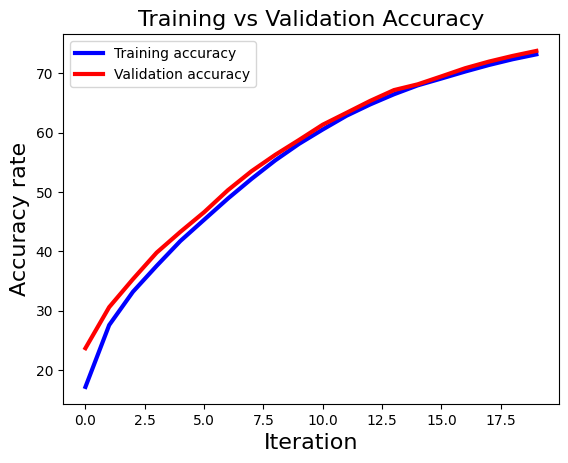

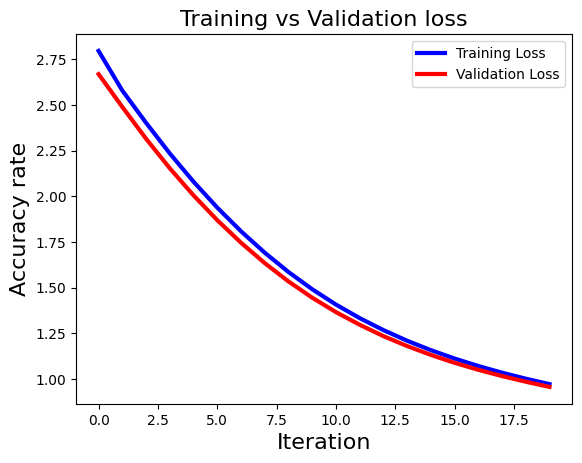

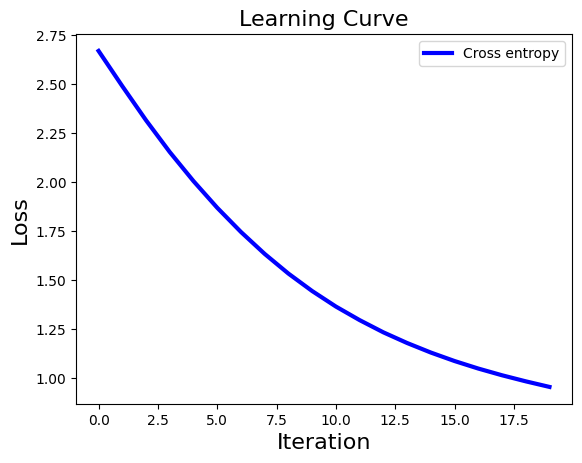

Confusion Matrix:


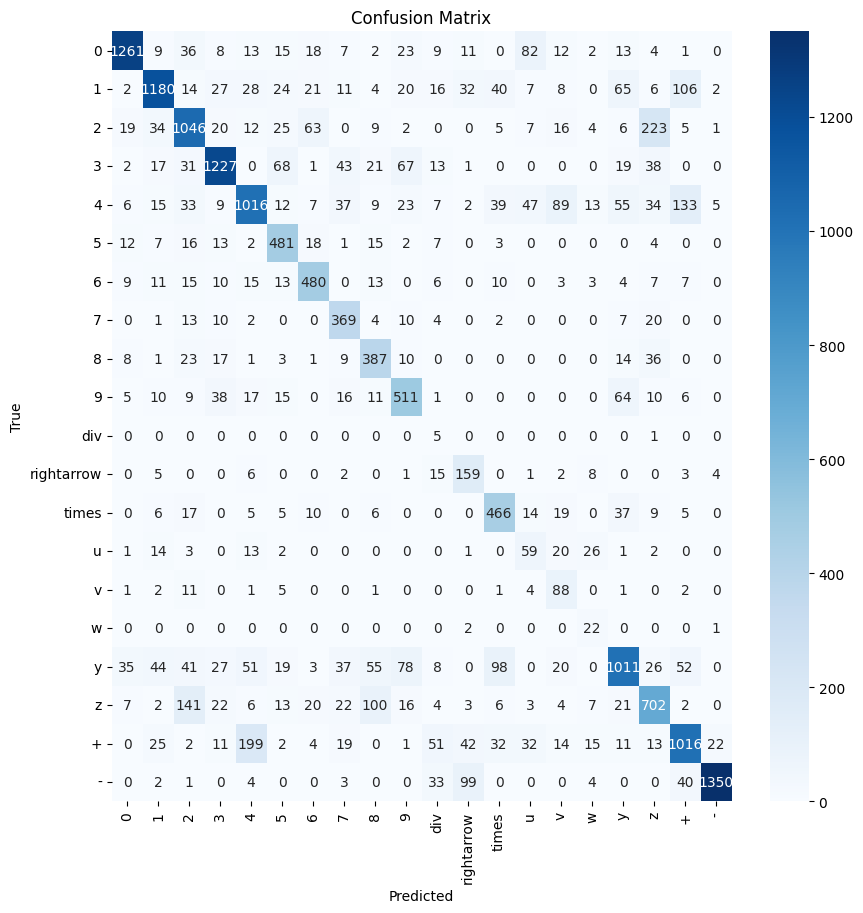

Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1368
           1       0.73      0.85      0.79      1385
           2       0.70      0.72      0.71      1452
           3       0.79      0.85      0.82      1439
           4       0.64      0.73      0.68      1391
           5       0.83      0.69      0.75       702
           6       0.79      0.74      0.77       646
           7       0.83      0.64      0.72       576
           8       0.76      0.61      0.67       637
           9       0.72      0.67      0.69       764
         div       0.83      0.03      0.05       179
  rightarrow       0.77      0.45      0.57       352
       times       0.78      0.66      0.72       702
           u       0.42      0.23      0.30       256
           v       0.75      0.30      0.43       295
           w       0.88      0.21      0.34       104
           y       0.63      0.76      0.69

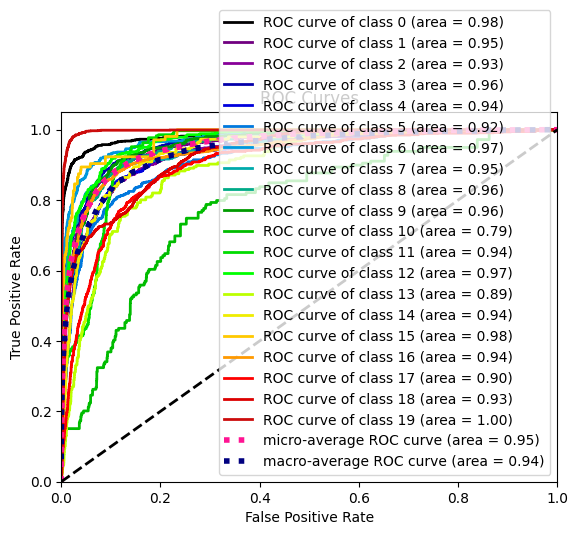

In [251]:
utils.plot_accuracy_curve(deep_2.train_accuracy, deep_2.validation_accuracy)
utils.plot_loss_curve(deep_2.train_loss, deep_2.validation_loss)
utils.plot_learning_curve(deep_2.validation_loss)
y_test_probs = deep_2._forward(X_test_preprocessed)
y_test_preds = np.argmax(y_test_probs, axis=1)
utils.plot_confusion_matrix(deep_2, goodlabels, X_test_preprocessed, y_test_preprocessed, y_test_preds)
utils.plot_roc_curve(y_test_preprocessed, y_test_probs)

#### Model 3: Conv1, relu, maxpool, flatten1,  Dense1, softmax, cross entropy

In [265]:
from model import Sequential
from layers.conv import ConvLayer
from layers.dense import DenseLayer
from layers.flatten import Flatten
from layers.maxpool import MaxPool
from layers.relu import ReluLayer

np.random.seed(42)


conv_1 = ConvLayer("conv_1", n_filters = 8, filter_size = 3, stride = 1, debug=False)
relu_1 = ReluLayer("relu_1")
max_1 = MaxPool("max_pool_1", 2, 2)

flatten_1 = Flatten("flatten_1")
dense_1 = DenseLayer("Dense_1", 3528, len(labels_map), debug=False, glorot_init=True)

layers = [conv_1, relu_1, max_1, flatten_1, dense_1]

conv_1_dense_1 = Sequential(layers)


In [272]:
conv_1_dense_1.reset_params()

In [273]:
conv_1_dense_1.train([X_train_preprocessed, y_train_preprocessed], [X_val_preprocessed, y_val_preprocessed], epochs=20, learning_rate=1e-02, debug=True, batch_size=64)

----------
Epoch 1
Init params conv_1
Init params Dense_1
Epoch Progress 99.90 %, batch 982, batch loss 1.8512707522376681, batch accuracy 45.0125
Time 586.3831243515015 seconds
Train Accuracy 28.84529789533923, Validation accuracy 44.13447782546495
Train Loss 2.5197352982905756, Validation loss 1.9326321974545322
----------
----------
Epoch 2
Epoch Progress 99.90 %, batch 982, batch loss 1.457291961916065, batch accuracy 58.333333333333336
Time 581.961989402771 seconds
Train Accuracy 51.917085267374574, Validation accuracy 58.15450643776824
Train Loss 1.6803917481797932, Validation loss 1.4976548654969895
----------
----------
Epoch 3
Epoch Progress 99.90 %, batch 982, batch loss 1.3484833394988298, batch accuracy 60.0375
Time 582.085914850235 seconds
Train Accuracy 61.94919565079163, Validation accuracy 64.93562231759657
Train Loss 1.3785879304171156, Validation loss 1.2880031937408285
----------
----------
Epoch 4
Epoch Progress 99.90 %, batch 982, batch loss 0.9078833435631436, bat

In [274]:
conv_1_dense_1.test([X_test_preprocessed, y_test_preprocessed])


(80.80114449213161, 0.7331447670565142)

In [269]:
print(conv_1_dense_1._layers_info())

Number of Layers 5
----------
Layer 1
Layer Name -> conv_1
Number of filters -> 8
Filters shape -> (8, 1, 3, 3)
Stride -> 1
----------
----------
Layer 2
Layer Name -> relu_1
----------
----------
Layer 3
Layer Name -> max_pool_1
Pool size -> 2
Stride -> 2
----------
----------
Layer 4
Layer Name -> flatten_1
----------
----------
Layer 5
Layer Name -> Dense_1
Weights shape -> (3528, 20)
----------



In [277]:
print(conv_1_dense_1.train_logs())

**********
Train and Validation metrics
Epochs -> 10
Batch Size -> 64
Learning rate -> 0.01
Accuracy and Loss at the end of 11 epochs
Train Accuracy -> 66.41603611623323, Validation Accuracy -> 67.18168812589414
Train Loss -> 1.3163063072758185, Validation Loss -> 1.280657085268447
**********
Epochs -> 20
Batch Size -> 64
Learning rate -> 0.01
Accuracy and Loss at the end of 21 epochs
Train Accuracy -> 81.16614738983913, Validation Accuracy -> 81.40200286123033
Train Loss -> 0.7258183737357372, Validation Loss -> 0.7287216197045958
**********



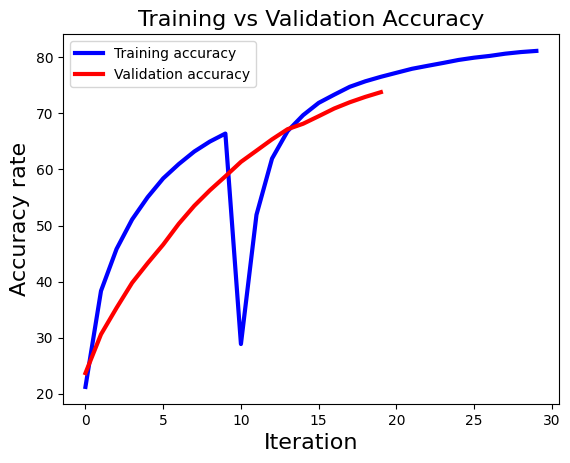

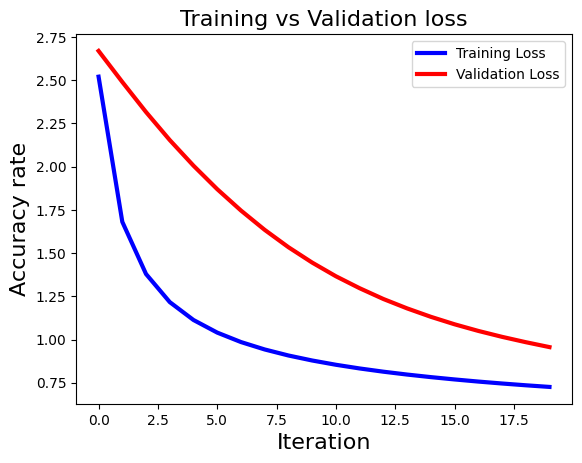

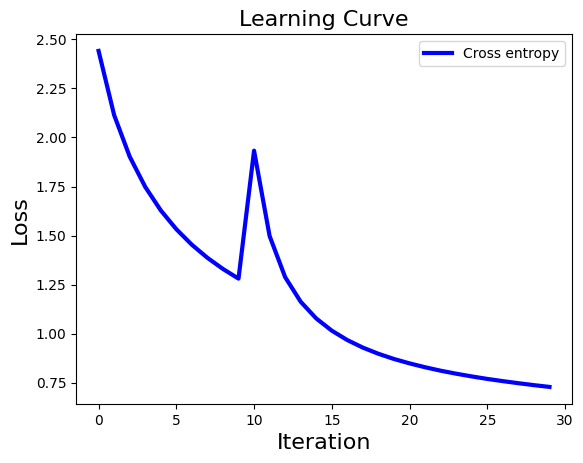

Confusion Matrix:


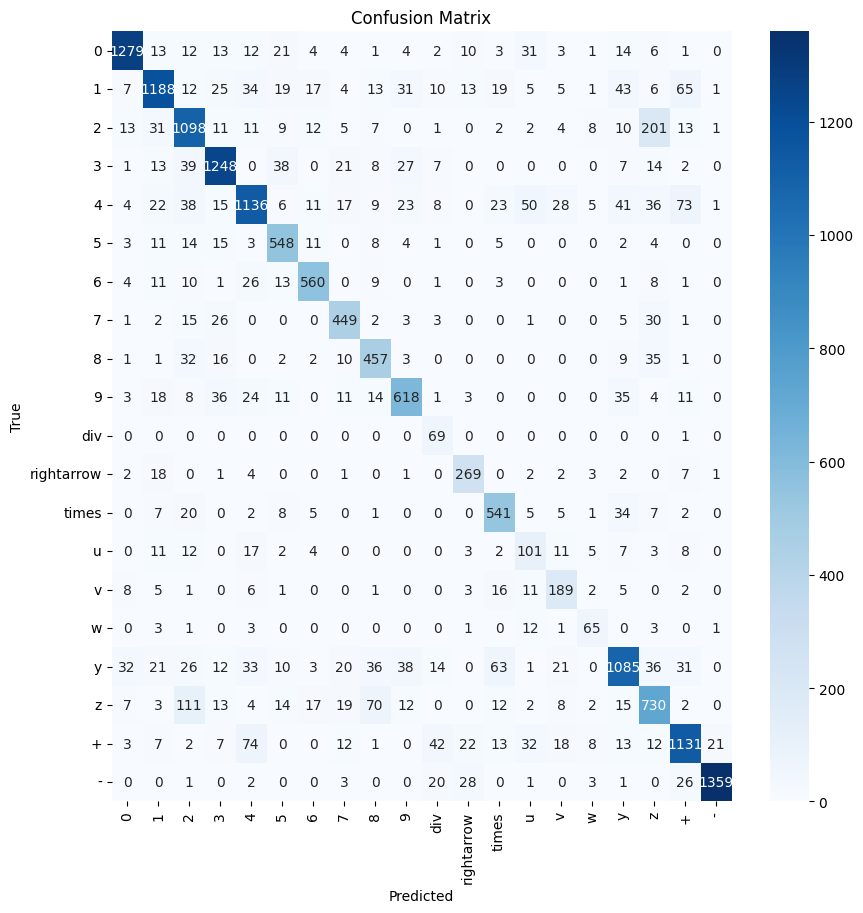

Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1368
           1       0.78      0.86      0.82      1385
           2       0.76      0.76      0.76      1452
           3       0.88      0.87      0.87      1439
           4       0.73      0.82      0.77      1391
           5       0.87      0.78      0.82       702
           6       0.86      0.87      0.87       646
           7       0.83      0.78      0.81       576
           8       0.80      0.72      0.76       637
           9       0.78      0.81      0.79       764
         div       0.99      0.39      0.55       179
  rightarrow       0.86      0.76      0.81       352
       times       0.85      0.77      0.81       702
           u       0.54      0.39      0.46       256
           v       0.76      0.64      0.69       295
           w       0.72      0.62      0.67       104
           y       0.73      0.82      0.77

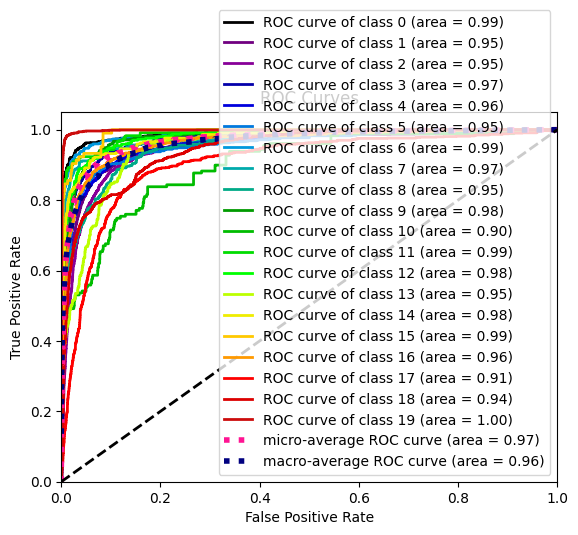

In [275]:
utils.plot_accuracy_curve(conv_1_dense_1.train_accuracy, deep_2.validation_accuracy)
utils.plot_loss_curve(conv_1_dense_1.train_loss, deep_2.validation_loss)
utils.plot_learning_curve(conv_1_dense_1.validation_loss)
y_test_probs = conv_1_dense_1._forward(X_test_preprocessed)
y_test_preds = np.argmax(y_test_probs, axis=1)
utils.plot_confusion_matrix(conv_1_dense_1, goodlabels, X_test_preprocessed, y_test_preprocessed, y_test_preds)
utils.plot_roc_curve(y_test_preprocessed, y_test_probs)

In [276]:
utils.save_model(conv_1_dense_1, "conv_1_dense_1_20")

# Conv 2, D 1

In [302]:
from model import Sequential
from layers.conv import ConvLayer
from layers.dense import DenseLayer
from layers.flatten import Flatten
from layers.maxpool import MaxPool
from layers.relu import ReluLayer

np.random.seed(42)


conv_1 = ConvLayer("conv_1", n_filters = 8, filter_size = 3, stride = 1, debug=False)
relu_1 = ReluLayer("relu_1")
max_1 = MaxPool("max_pool_1", 2, 2)

conv_2 = ConvLayer("conv_2", n_filters = 12, filter_size = 5, stride = 1, debug=False)
relu_2 = ReluLayer("relu_2")
max_2 = MaxPool("max_pool_2", 2, 2)

flatten_1 = Flatten("flatten_1")

dense_1 = DenseLayer("Dense_1", 768, len(labels_map), debug=False)
relu_3 = ReluLayer("relu_3")

layers = [conv_1, relu_1, max_1, conv_2, relu_2, max_2, flatten_1, dense_1]

conv_2_dense_1 = Sequential(layers)


In [303]:
conv_2_dense_1.reset_params()

In [304]:
conv_2_dense_1.train([X_train_preprocessed, y_train_preprocessed], [X_val_preprocessed, y_val_preprocessed], epochs=20, learning_rate=1e-01, debug=True, batch_size=128)

----------
Epoch 1
Init params conv_1
Init params conv_2
Init params Dense_1
Epoch Progress 99.90 %, batch 491, batch loss 1.70515807091993, batch accuracy 53.333333333333336
Time 1035.9082055091858 seconds
Train Accuracy 36.63762955426973, Validation accuracy 53.71959942775394
Train Loss 2.428148424638446, Validation loss 1.6114040376246062
----------
----------
Epoch 2
Epoch Progress 99.90 %, batch 491, batch loss 1.4153903179714526, batch accuracy 63.33333333333333
Time 1163.815766096115 seconds
Train Accuracy 58.51561009728492, Validation accuracy 62.77539341917024
Train Loss 1.429165457041504, Validation loss 1.2714399968390973
----------
----------
Epoch 3
Epoch Progress 99.90 %, batch 491, batch loss 1.1693124149303442, batch accuracy 63.33333333333333
Time 1204.4745886325836 seconds
Train Accuracy 65.3684745978254, Validation accuracy 68.0972818311874
Train Loss 1.198604909859093, Validation loss 1.1136200919355597
----------
----------
Epoch 4
Epoch Progress 99.90 %, batch 491

In [415]:
print(conv_2_dense_1._layers_info())

Number of Layers 8
----------
Layer 1
Layer Name -> conv_1
Number of filters -> 8
Filters shape -> (8, 1, 3, 3)
Stride -> 1
----------
----------
Layer 2
Layer Name -> relu_1
----------
----------
Layer 3
Layer Name -> max_pool_1
Pool size -> 2
Stride -> 2
----------
----------
Layer 4
Layer Name -> conv_2
Number of filters -> 12
Filters shape -> (12, 8, 5, 5)
Stride -> 1
----------
----------
Layer 5
Layer Name -> relu_2
----------
----------
Layer 6
Layer Name -> max_pool_2
Pool size -> 2
Stride -> 2
----------
----------
Layer 7
Layer Name -> flatten_1
----------
----------
Layer 8
Layer Name -> Dense_1
Weights shape -> (768, 20)
----------



In [305]:
print(conv_2_dense_1.train_logs())

**********
Train and Validation metrics
Epochs -> 20
Batch Size -> 128
Learning rate -> 0.1
Accuracy and Loss at the end of 21 epochs
Train Accuracy -> 83.9209639473517, Validation Accuracy -> 83.99141630901288
Train Loss -> 0.5917024023176323, Validation Loss -> 0.5874054145405015
**********



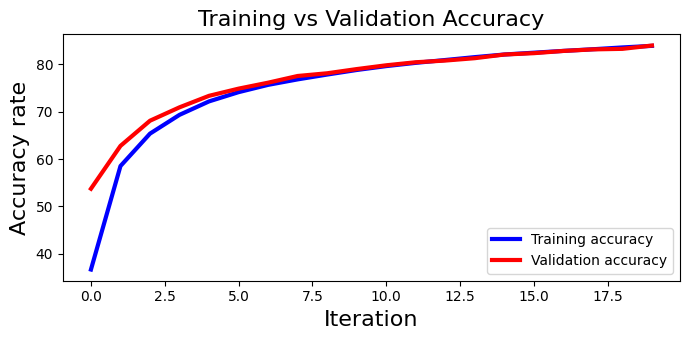

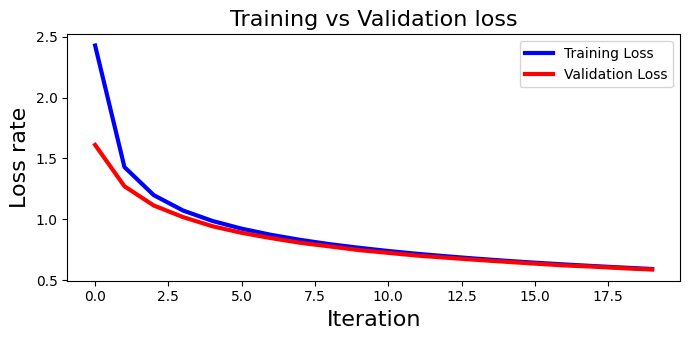

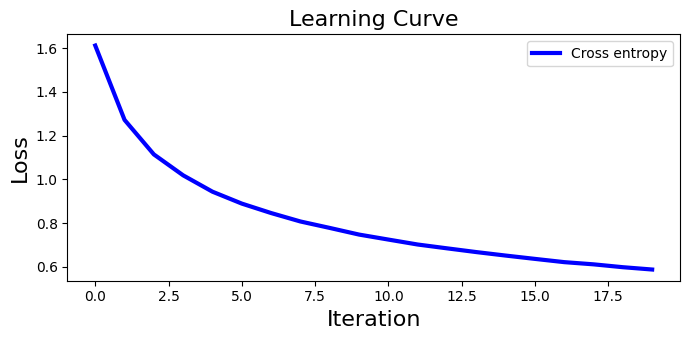

In [416]:
utils.plot_accuracy_curve(conv_2_dense_1.train_accuracy, conv_2_dense_1.validation_accuracy)
utils.plot_loss_curve(conv_2_dense_1.train_loss, conv_2_dense_1.validation_loss)
utils.plot_learning_curve(conv_2_dense_1.validation_loss)


Confusion Matrix:


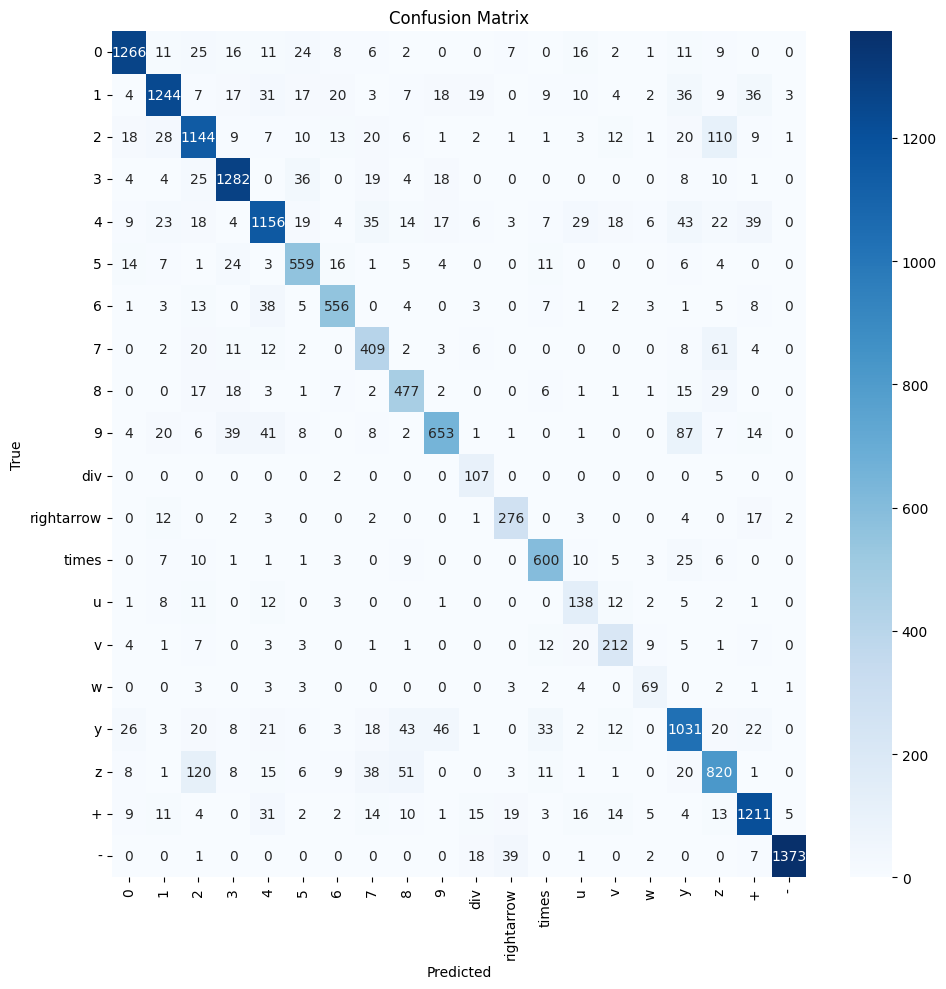

Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1368
           1       0.83      0.90      0.86      1385
           2       0.81      0.79      0.80      1452
           3       0.91      0.89      0.90      1439
           4       0.79      0.83      0.81      1391
           5       0.85      0.80      0.82       702
           6       0.86      0.86      0.86       646
           7       0.76      0.71      0.73       576
           8       0.82      0.75      0.78       637
           9       0.73      0.85      0.79       764
         div       0.94      0.60      0.73       179
  rightarrow       0.86      0.78      0.82       352
       times       0.88      0.85      0.87       702
           u       0.70      0.54      0.61       256
           v       0.74      0.72      0.73       295
           w       0.76      0.66      0.71       104
           y       0.78      0.78      0.78

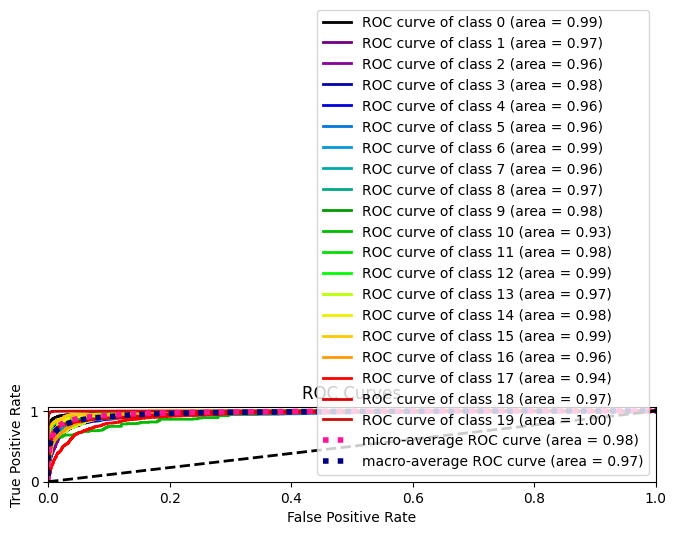

In [413]:
y_test_probs = conv_2_dense_1._forward(X_test_preprocessed)
y_test_preds = np.argmax(y_test_probs, axis=1)
utils.plot_confusion_matrix(conv_2_dense_1, goodlabels, X_test_preprocessed, y_test_preprocessed, y_test_preds)
utils.plot_roc_curve(y_test_preprocessed, y_test_probs)

In [308]:
utils.save_model(conv_2_dense_1, "conv_2_dense_1")

In [309]:
conv_2_dense_1.test([X_test_preprocessed, y_test_preprocessed])

(83.45064377682402, 0.5987922885351344)

# Filter/Weights visualization

# Conv 1 layer

In [341]:
conv_2_dense_1.layers[0].conv_filters.shape

(8, 1, 3, 3)

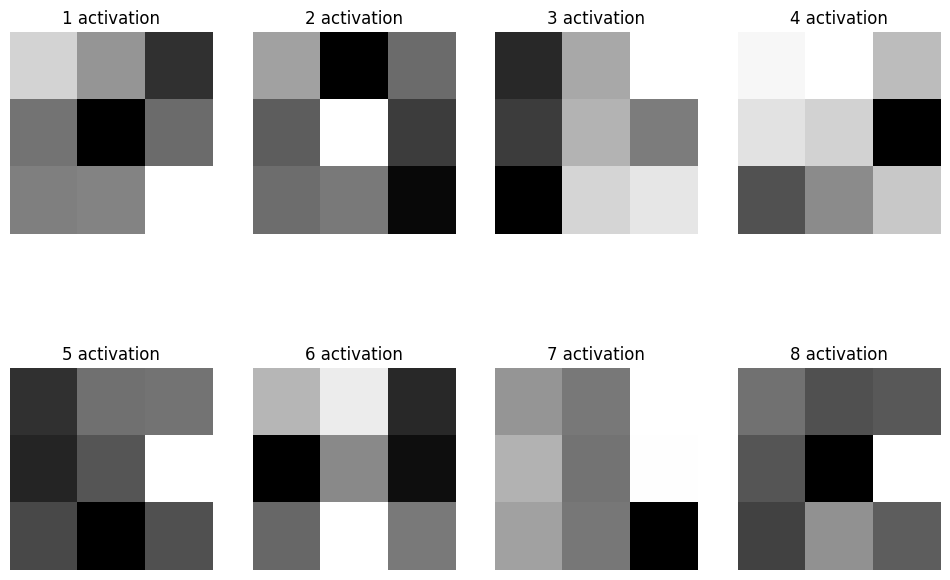

In [382]:
utils.visualize_filters(conv_2_dense_1.layers[0].conv_filters, 2, 4, "Conv1 Activations")

In [319]:
conv_2_dense_1.layers[3].conv_filters.shape

(12, 8, 5, 5)

# Conv 2 layer

In [411]:
conv_2_dense_1.layers[3].conv_filters[0].shape

(8, 5, 5)

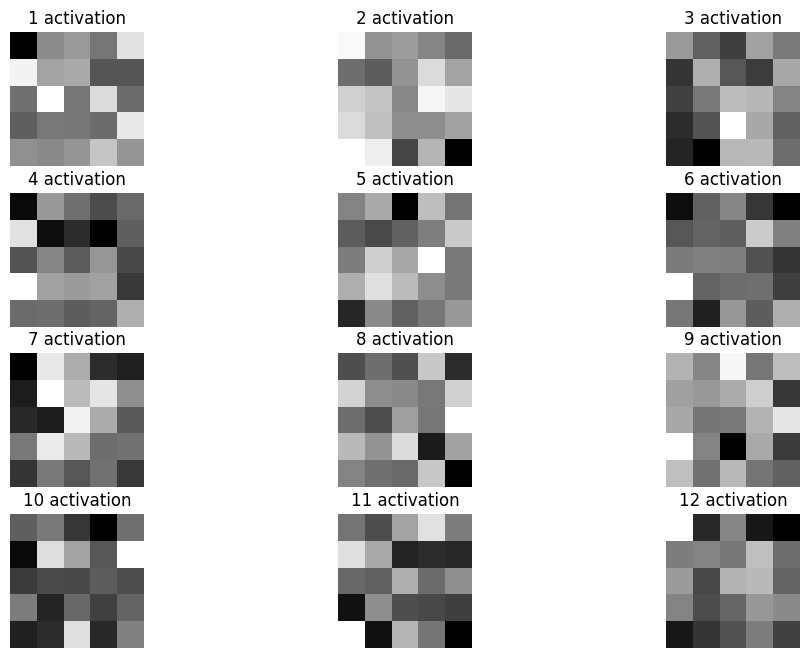

In [393]:
utils.visualize_filters(conv_2_dense_1.layers[3].conv_filters, 4, 3)

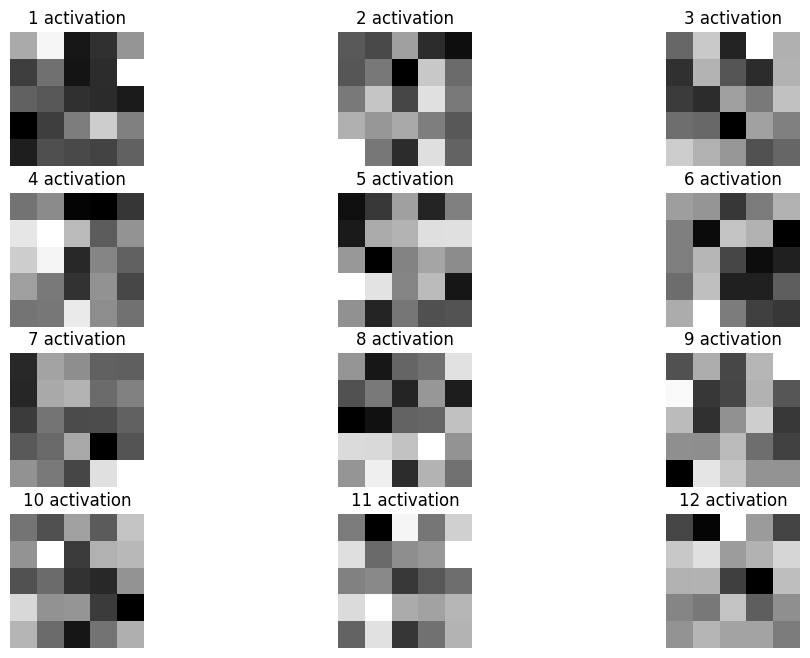

In [392]:
utils.visualize_filters(conv_2_dense_1.layers[3].conv_filters, 4, 3)

# Dense 1

In [344]:
conv_2_dense_1.layers

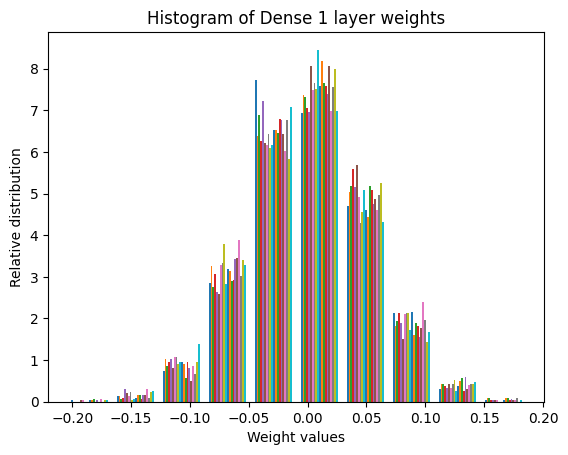

In [349]:
utils.plot_histogram("Dense 1", conv_2_dense_1.layers[-1].weights)

# Activations visualization

# Conv 1

In [361]:
c1 = conv_2_dense_1.layers[0]

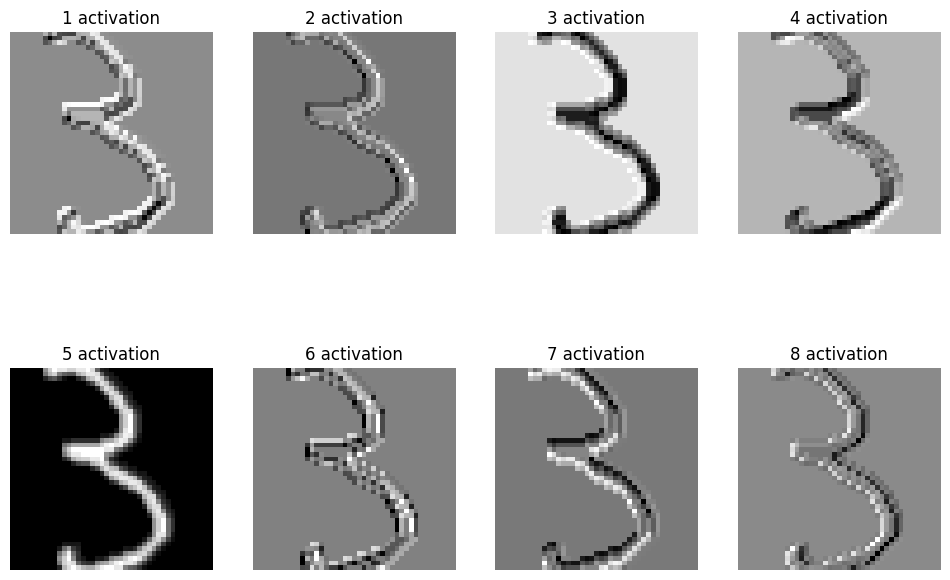

In [363]:
utils.visualize_activations(c1.cached_output_activations[0], 2, 4)

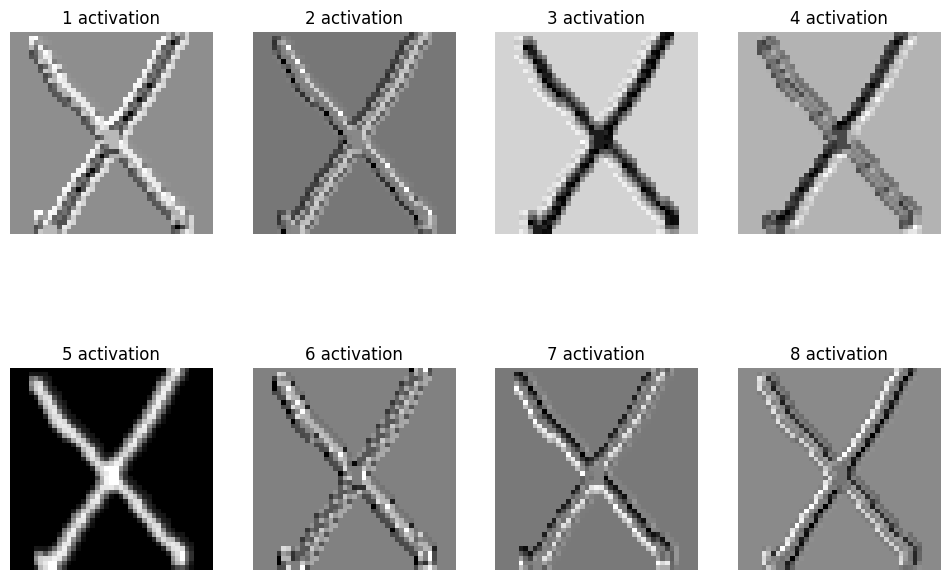

In [365]:
utils.visualize_activations(c1.cached_output_activations[1], 2, 4)

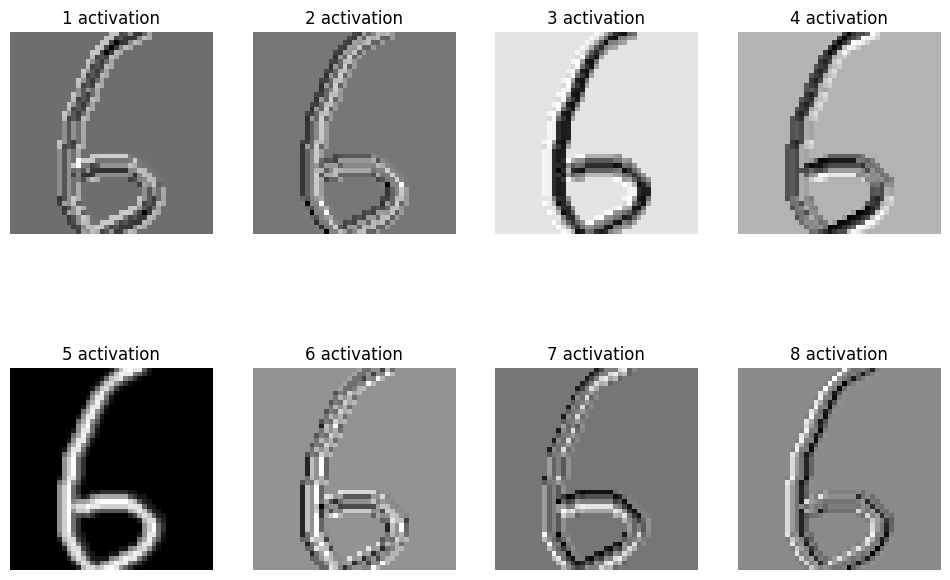

In [380]:
utils.visualize_activations(c1.cached_output_activations[42], 2, 4)

# Conv 2

In [366]:
c2 = conv_2_dense_1.layers[3]

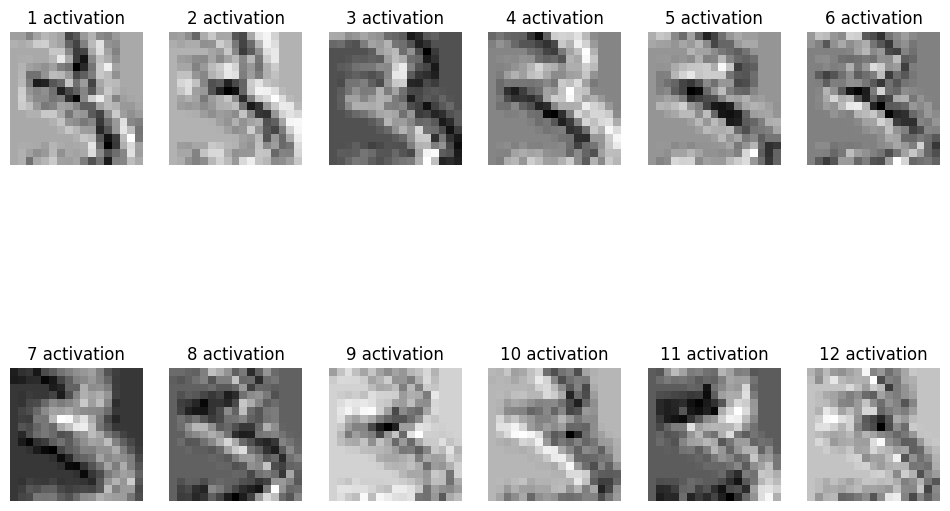

In [367]:
utils.visualize_activations(c2.cached_output_activations[0], 2, 6)

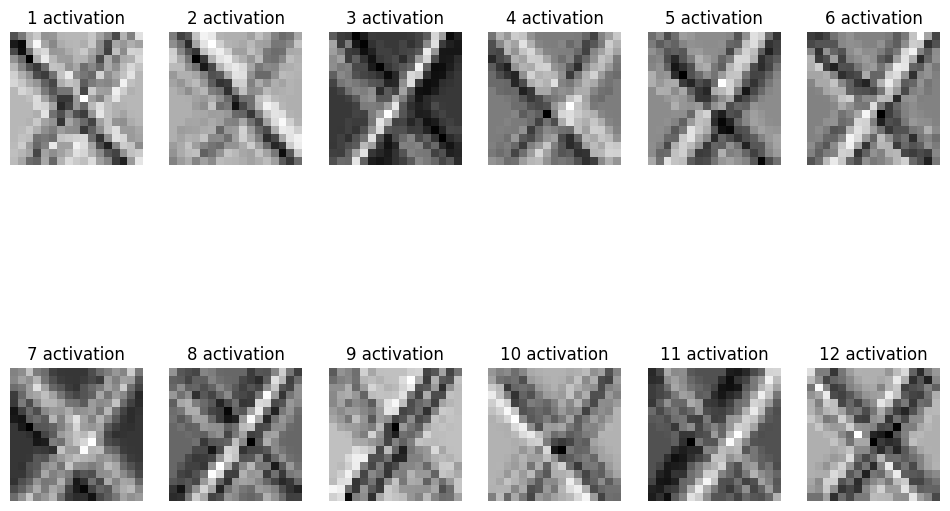

In [360]:
utils.visualize_activations(c2.cached_output_activations[1], 2, 6)

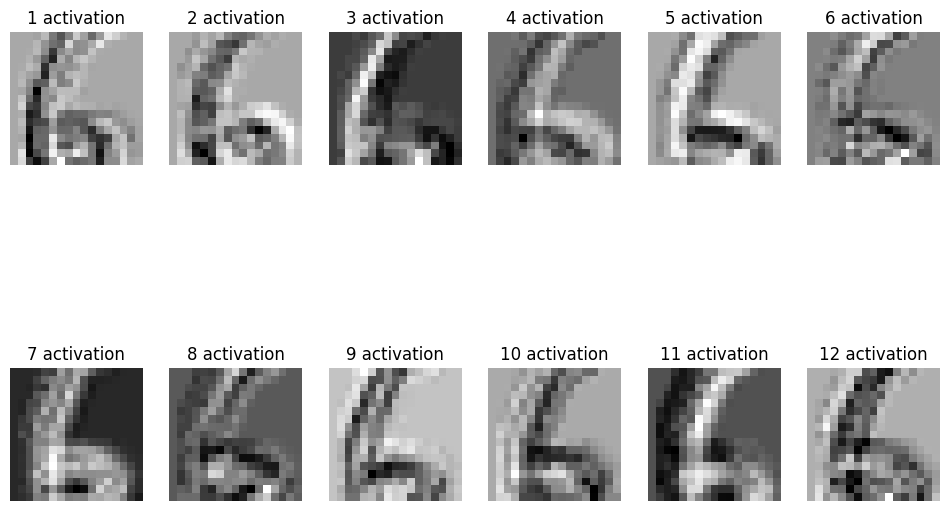

In [379]:
utils.visualize_activations(c2.cached_output_activations[42], 2, 6)